## 3차 과제 - 당뇨병을 예측해보자
- 주제: 데이터 분석 실습(머신러닝)
- 데이터: 피마 인디언 당뇨병 데이터
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
- 사용 라이브러리: numpy, pandas, matplotlib, sklearn


### 1. EDA, 전처리

1.1 분석을 위해 사용될 라이브러리들을 import 하세요.

numpy, pandas, matplotlib, sklearn(train_test_split, accurarcy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve, StandardScaler, LogisticRegression)

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression



1.2 데이터를 불러오고 타겟 변수('Outcome')에 속한 값들의 비율과(value_counts 활용) 전체 데이터 앞 7개 값을 확인하세요.

In [9]:
data = pd.read_csv('./diabetes.csv')

In [10]:
data.head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


1.3 데이터의 feature 타입과 Null 개수를 확인하세요.

In [11]:
display(data.shape)

data.isnull().sum() ## 결측치 없넹

(768, 9)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [28]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### 훈련데이터, target 데이터 나누기 준비

1.4 예측을 위해 데이터를 feature 데이터 셋과 target 데이터 셋으로 나누세요.

In [12]:
X = data.drop('Outcome', axis=1) ##.drop에서는 바로 컬럼만 입력하면 됨
y = data['Outcome']

1.5 X와 y로 나눈 데이터 셋을 다시 train, test로 나누세요(test_size = 0.3, random_state=123, stratify=y).

In [25]:
# 트테트테로 외우기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=123, shuffle = True, stratify=y) ##stratify = y 설정하면, y의 클래스에 맞춰서 데이터 target 불균형 맞출 수 있음

1.6 test size는 어느정도로 해야 좋은지 그리고 왜 그래야 하는지 작성하세요.

데이터의 개수에 따라서 test_size를 조절해야하지만, 데이터가768개 밖에 없는데 0.3은 좀 많지 않은가 생각이 들긴 함! 0.2개로 하고 cross valitdaion하는게 더 이득!

1.7 startify 값을 설정하는 이유와 언제 주로 사용되는지 서술하세요.

클래스 불균형 할 때, stratify를 설정해서 특정 칼럼을 기준으로 비율 맞춰서 진행해주는 것

### 2. 예측 및 분석

2.1 성능 평가에 사용될 함수를 만들어보겠습니다. accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score로 구성되어 있으며 이를 한번에 출력할 수 있도록 합니다.

In [26]:
## pred: 모델이 데이터 포인트가 속한다고 예측한 클래스 레이블 / pred_proba: 모델이 각 클래스에 대해 예측한 확률 (확신 정도)
def clf_eval(y_test, pred=None, pred_proba=None):
    # 오차행렬
    confusion = confusion_matrix(y_test, pred)

    # 정확도
    accuracy = accuracy_score(y_test, pred)

    # 정밀도
    precision = precision_score(y_test, pred)

    # 재현율
    recall = recall_score(y_test, pred)

    # F1 스코어
    f1 = f1_score(y_test, pred)

    # ROC-AUC 스코어
    roc_auc = roc_auc_score(y_test, pred_proba)

    print('오차 행렬,\n', confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

2. 위에서 사용한 성능지표인 Confusion Matrix에 대해 설명하세요.

분류 문제에서 모델의 성능을 평가하는 도구. 실제 클래스와 모델에 의해 예측된 클래스를 요약하여 보여줌.

정확도, 정밀도, 재현율, f1 score등의 세부 정보를 볼 수 있음

2.2 로지스틱 회귀로 예측 후 위에서 만든 clf_eval() 함수를 통해 잘 예측했는지 확인하세요(solver='linear'로 설정, 예측 변수명은 pred, pred_proba).

In [27]:
lr = LogisticRegression(solver='liblinear', random_state=123) #특정 솔버들은 GD, SGD, MBFD등 사용. 이 과정에서 데이터 포인트의 순서를 무작위로 섞으니 random_state설정해서 재현성 보장
lr.fit(X_train ,y_train)

#예측
pred = lr.predict(X_test)
pred_proba = lr.predict_proba(X_test)[:, 1] # 양성 클래스에 대한 확률

clf_eval(y_test, pred, pred_proba)

오차 행렬,
 [[134  16]
 [ 39  42]]
정확도: 0.7619, 정밀도: 0.7241, 재현율: 0.518519, F1: 0.6043, AUC:0.8433


2.3 LogisticRegression에서 solver 파라미터의 역할과 어떤 것들이 있고 각각은 무엇을 의미하는지 작성하세요.

LogisticRegression에서 solver는 'liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'가 있음

liblinear은 작은 데이터셋, 이진 분류에 적합
나머지는 큰 데이터셋, 다중분류에 적합

1. liblinear: l1, l2 규제와 함께 사용. 좌표하강법을 사용하여 각 반복에서 하나의 파라미터를 최적화
2. newton-cg, lbfgs: L2 규제를 사용할 때 권장. 뉴턴 방법의 변형을 사용하여 손실 함수의 최소값 찾음. 손실 함수의 두 번째 도함수(헤시안)을 사용하여 파라미터 업데이트에 필요한 방향과 크기를 계산. 더 정확한 해를 찾을 수 있으며, 메모리를 효율적으로 사용
3. sag, sage: 확률적 경사하강법의 변형. 과거의 기울기를 평균하여 업데이트에 사용. l1규제에 더 잘 대응


2.4 pred와 pred_proba는 각각 어떤 차이가 있는지 작성하세요.

pred는 특정 클래스로 예측한 값

pred_proba는 특정 클래스로 예측한 확률

2.5 전체 데이터 중 약 65%가 Negative이므로 재현율 성능에 조첨을 맞추겠습니다. 정밀도 재현율 curve를 보고 임계값 별 정밀도 재현율 값의 변화를 확인하기 위해 이를 위한 함수를 작성하겠습니다.

In [29]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    #threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    #X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행, 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    #threshold 값 X축의 Scale을 0.1단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    #X축, y축 label과 legend, grid 설정
    ### 직접 작성(xlabel - 'Threshold value', ylabel = 'Precision and Recall value'), legend, grid는 default값으로
    plt.xlabel('Threshold value')
    plt.ylabel('Prevision and Recall value')
    plt.legend()
    plt.grid(True)
    
    plt.show()

2.6 작성한 함수를 바탕으로 임계값 별 정밀도와 재현율 값 변화를 확인하세요.

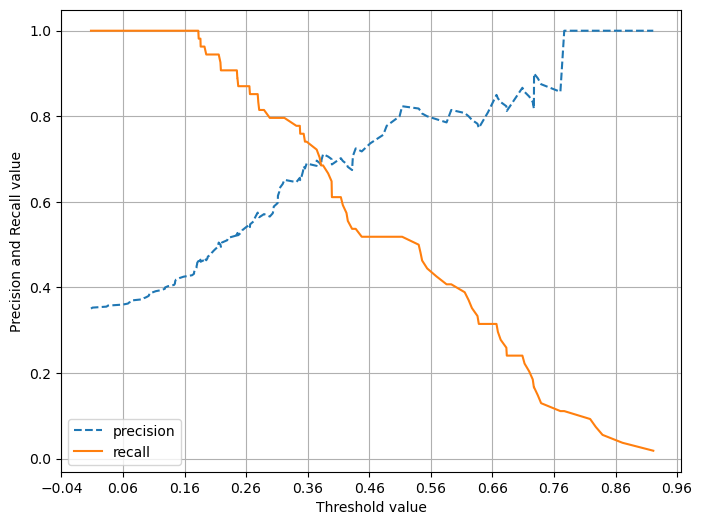

In [40]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test, pred_proba_c1)

2.7 그래프를 통해 확인했을 때 Threshold를 0.38정도로 설정했을 때 recall과 precision이 어느정도 균형이 맞음을 알 수 있습니다. 그러나 두 지표 모두 0.7 이하로 낮은 값이기에 다시 확인하도록 하겠습니다. 먼저 describe() 함수를 통해 개별 feature에 대한 분포도를 확인하세요.

2.8 위에서 확인해봤을 때 min 값이 0으로 되어 있는 feature가 다수 존재합니다. Glucose(포도당 수치), BMI 지수가 0인 것은 말이 안 되므로 이들을 평균값으로 대체하세요.

In [43]:
### Glucose, BloodPressure, SkinThickness, Insulin, BMI에 대해 평균값으로 대체


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


2.9 이후 대체한 feature들에 대해 feature scaling을 진행하겠습니다. 모두 numeric feature이므로 X에 대해 StandardScaler를 일괄 적용하세요.

2.10 feature scaling은 왜 사용하고 어떤 것들이 있는지 작성하세요.

2.11 다시 에측하기에 앞서 위에서 scaling을 통해 변경된 X_scaled를 활용해 다시 train_test_split을 진행하세요(함수 파라미터 동일).

2.12 로지스틱 회귀로 앞서 진행한 것과 동일하게 진행하세요.

오차 행렬,
 [[132  18]
 [ 39  42]]
정확도: 0.7532, 정밀도: 0.7000, 재현율: 0.518519, F1: 0.5957, AUC:0.8585


### 3. 자유 분석
성능을 높일 수 있는 방법들을 활용해 예측을 진행하세요.